In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Processed data

In [2]:
file_path = r"D:\Machine learning\ML- project\CryptoForecasting\data\processed_data\btcusdt_1d_processed.csv"

df = pd.read_csv(file_path)
df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,Taker Buy Base Volume,Taker Buy Quote Volume,Ignore,Average Price,Price Change
0,2022-04-29,39742.06,39925.25,38175.00,38596.11,51453.65715,2022-04-29 23:59:59.999,2.006136e+09,1101140,24773.60543,9.661258e+08,0,39050.125,-1145.95
1,2022-04-30,38596.11,38795.38,37578.20,37630.80,35321.18989,2022-04-30 23:59:59.999,1.354901e+09,1017369,16523.43017,6.340764e+08,0,38186.790,-965.31
2,2022-05-01,37630.80,38675.00,37386.38,38468.35,38812.24104,2022-05-01 23:59:59.999,1.478259e+09,1021157,19551.11747,7.448258e+08,0,38030.690,837.55
3,2022-05-02,38468.35,39167.34,38052.00,38525.16,53200.92628,2022-05-02 23:59:59.999,2.058451e+09,1053893,27276.29561,1.055370e+09,0,38609.670,56.81
4,2022-05-03,38525.16,38651.51,37517.80,37728.95,40316.45358,2022-05-03 23:59:59.999,1.539320e+09,1005131,20002.76343,7.640169e+08,0,38084.655,-796.21


In [3]:
df.drop(['Close Time', 'Ignore'], axis=1, inplace=True)

In [4]:
df['Open Time'] = pd.to_datetime(df['Open Time'])



In [5]:
df['year'] = df['Open Time'].dt.year  
df['month'] = df['Open Time'].dt.month  
df['day'] = df['Open Time'].dt.day

In [6]:
df.drop(['Open Time'], axis=1, inplace=True)

In [7]:
df.head()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,Taker Buy Base Volume,Taker Buy Quote Volume,Average Price,Price Change,year,month,day
0,39742.06,39925.25,38175.00,38596.11,51453.65715,2.006136e+09,1101140,24773.60543,9.661258e+08,39050.125,-1145.95,2022,4,29
1,38596.11,38795.38,37578.20,37630.80,35321.18989,1.354901e+09,1017369,16523.43017,6.340764e+08,38186.790,-965.31,2022,4,30
2,37630.80,38675.00,37386.38,38468.35,38812.24104,1.478259e+09,1021157,19551.11747,7.448258e+08,38030.690,837.55,2022,5,1
3,38468.35,39167.34,38052.00,38525.16,53200.92628,2.058451e+09,1053893,27276.29561,1.055370e+09,38609.670,56.81,2022,5,2
4,38525.16,38651.51,37517.80,37728.95,40316.45358,1.539320e+09,1005131,20002.76343,7.640169e+08,38084.655,-796.21,2022,5,3


In [8]:
df.corr()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,Taker Buy Base Volume,Taker Buy Quote Volume,Average Price,Price Change,year,month,day
Open,1.000000,0.999159,0.999036,0.998440,-0.492029,-0.163655,-0.045201,-0.490655,-0.165451,0.999408,0.036640,0.845377,0.003253,0.005217
High,0.999159,1.000000,0.998762,0.999381,-0.485783,-0.151983,-0.036315,-0.484116,-0.153050,0.999704,0.068475,0.844939,0.001223,0.004562
Low,0.999036,0.998762,1.000000,0.999236,-0.498207,-0.175688,-0.052536,-0.496487,-0.176644,0.999677,0.068077,0.847376,0.005859,0.008078
Close,0.998440,0.999381,0.999236,1.000000,-0.491313,-0.162467,-0.043695,-0.489413,-0.163009,0.999619,0.092377,0.846839,0.002602,0.005237
Volume,-0.492029,-0.485783,-0.498207,-0.491313,1.000000,0.894770,0.793565,0.999837,0.894072,-0.492014,-0.018943,-0.521307,-0.050848,-0.014089
Quote Asset Volume,-0.163655,-0.151983,-0.175688,-0.162467,0.894770,1.000000,0.887377,0.895609,0.999404,-0.163632,0.010698,-0.238628,-0.123689,-0.032088
Number of Trades,-0.045201,-0.036315,-0.052536,-0.043695,0.793565,0.887377,1.000000,0.794368,0.886330,-0.044265,0.024036,-0.170684,0.044699,-0.013115
Taker Buy Base Volume,-0.490655,-0.484116,-0.496487,-0.489413,0.999837,0.895609,0.794368,1.000000,0.895451,-0.490321,-0.009454,-0.518968,-0.052235,-0.013258
Taker Buy Quote Volume,-0.165451,-0.153050,-0.176644,-0.163009,0.894072,0.999404,0.886330,0.895451,1.000000,-0.164644,0.033027,-0.237652,-0.125989,-0.030859
Average Price,0.999408,0.999704,0.999677,0.999619,-0.492014,-0.163632,-0.044265,-0.490321,-0.164644,1.000000,0.068301,0.846393,0.003492,0.006284


<Axes: >

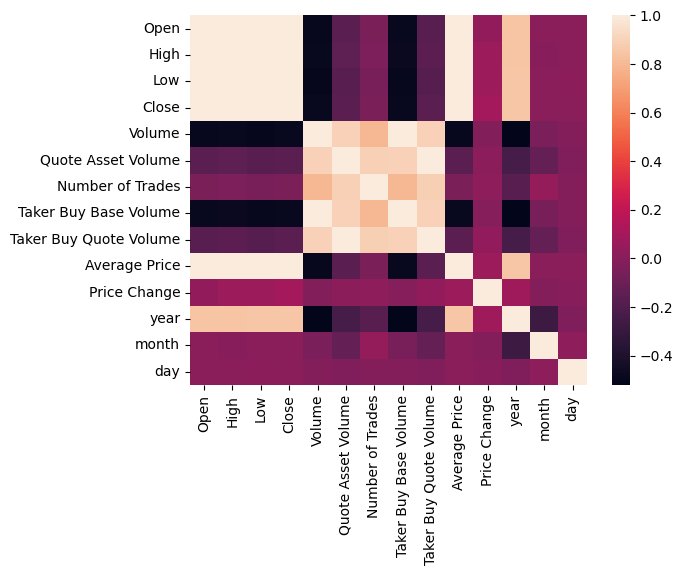

In [9]:
import seaborn as sns
sns.heatmap(df.corr())

In [10]:
# features = [
#     "Volume", "Quote Asset Volume", "Number of Trades", 
#     "Taker Buy Base Volume", "Taker Buy Quote Volume", 
#     "Price Change", "year", "month", "day", "Close"
# ]

# df = df[features]

In [11]:
X = df.drop(columns=['Close'], axis=1)

y = df['Close']

In [12]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume',
       'Number of Trades', 'Taker Buy Base Volume', 'Taker Buy Quote Volume',
       'Average Price', 'Price Change', 'year', 'month', 'day'],
      dtype='object')

In [13]:
split_ratio = 0.8
split_point = int(len(df) * split_ratio)

train_X = X[:split_point]
train_y = y[:split_point]

test_X = X[split_point:]
test_y = y[split_point:]

In [14]:
import seaborn as sns

# sns.heatmap(df.corr())

In [15]:
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(train_X, train_y)


# model = XGBRegressor(
#     n_estimators=3000,
#     learning_rate=0.01,
#     max_depth=6,
#     min_child_weight=1,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     gamma=0
# )
# model.fit(train_X, train_y)



LinearRegression()

In [18]:
from sklearn.metrics import mean_absolute_error, r2_score

train_predictions = model.predict(train_X)
test_predictions = model.predict(test_X)

train_mae = mean_absolute_error(train_y, train_predictions)
test_mae = mean_absolute_error(test_y, test_predictions)



print(f"Train MAE: {train_mae}")
print(f"Test MAE: {test_mae}")


Train MAE: 5.662127477989998e-10
Test MAE: 7.235939847305417e-10


In [17]:
mean_squared_error(test_y, test_predictions)

9.684725902977414e-19